In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1L5GSRbeoQeUofNI9oP_twgGBr3NLtK2k/view?usp=sharing
!unzip -q '/content/PBL Series #3 CNN - Emotion.zip'
!pip install torchinfo timm -q

Downloading...
From: https://drive.google.com/uc?id=1L5GSRbeoQeUofNI9oP_twgGBr3NLtK2k
To: /content/PBL Series #3 CNN - Emotion.zip
100% 60.7M/60.7M [00:00<00:00, 66.2MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.3 MB/s eta 0:00:00


##Timm

In [ ]:
import torch
import timm

class CNN(torch.nn.Module):
    def __init__(self, model_name, num_classes, freeze_base_model=True):
        super().__init__()
        self.base_model = timm.create_model(
            model_name=model_name,
            pretrained=True,
            num_classes=num_classes)

        if freeze_base_model:
            for name, layer in self.base_model.named_children():
                if name != [i for i, _ in self.base_model.named_children()][-1]:
                    for param in layer.parameters():
                        param.requires_grad = False

    def forward(self, x):
        return self.base_model(x)

    def get_transforms(self, is_training):
        data_config = timm.data.resolve_model_data_config(self.base_model)
        return timm.data.create_transform(**data_config, is_training=is_training)

    def summary(self, input_size):
        from torchinfo import summary
        print(summary(model, input_size=input_size, col_names=("input_size","output_size", "num_params", "trainable")) )

In [ ]:
model_name = 'convnextv2_tiny.fcmae_ft_in22k_in1k_384'
model = CNN(model_name, 3, False)

train_transforms = model.get_transforms(True)
transforms = model.get_transforms(False)

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

In [ ]:
train_transforms

Compose(
    RandomResizedCropAndInterpolation(size=(384, 384), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
transforms

Compose(
    Resize(size=(384, 384), interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(384, 384))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
model.summary([1, 3, 384, 384])

Layer (type:depth-idx)                                            Input Shape               Output Shape              Param #                   Trainable
CNN                                                               [1, 3, 384, 384]          [1, 3]                    --                        True
├─ConvNeXt: 1-1                                                   [1, 3, 384, 384]          [1, 3]                    --                        True
│    └─Sequential: 2-1                                            [1, 3, 384, 384]          [1, 96, 96, 96]           --                        True
│    │    └─Conv2d: 3-1                                           [1, 3, 384, 384]          [1, 96, 96, 96]           4,704                     True
│    │    └─LayerNorm2d: 3-2                                      [1, 96, 96, 96]           [1, 96, 96, 96]           192                       True
│    └─Sequential: 2-2                                            [1, 96, 96, 96]           [1, 768, 

In [ ]:
import torch
from torchvision.transforms import v2

train_transforms = v2.Compose([
    v2.Resize(size=(384, 384), interpolation=v2.InterpolationMode.BICUBIC, antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4)),
    v2.RandAugment(),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.4850, 0.4560, 0.4060], std=[0.2290, 0.2240, 0.2250]),
])

transforms = v2.Compose([
    v2.Resize(size=(384, 384), interpolation=v2.InterpolationMode.BICUBIC, antialias=True),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.4850, 0.4560, 0.4060], std=[0.2290, 0.2240, 0.2250]),
])

## PPT

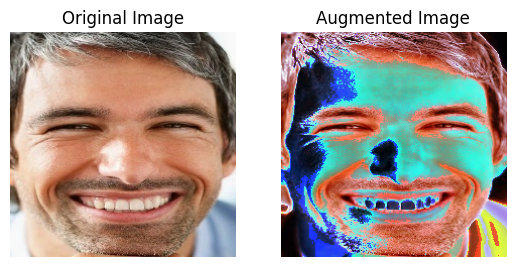

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# aug_cls = v2.Resize(size=(384, 384), interpolation=v2.InterpolationMode.BICUBIC, antialias=True)
aug_cls = v2.RandAugment()

img = Image.open('/content/Human Emotion Classification/train/happy/1019.jpg')
aug_img = aug_cls(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aug_img)
plt.title('Augmented Image')
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/Human Emotion Classification/train/happy/1019.jpg')
aug_img = v2.Resize(size=(384, 384), interpolation=v2.InterpolationMode.BICUBIC, antialias=True)(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aug_img)
plt.title('Resized Image')
plt.axis('off')
plt.show()

In [ ]:
[str(transform) for transform in train_transforms.transforms]

['Resize(size=[384, 384], interpolation=InterpolationMode.BICUBIC, antialias=True)',
 'RandomHorizontalFlip(p=0.5)',
 'ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4))',
 'RandAugment(interpolation=InterpolationMode.NEAREST, num_ops=2, magnitude=9, num_magnitude_bins=31)',
 'ToImage()',
 'ToDtype(scale=True)',
 'Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)']

## Data

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

train_dir = 'Human Emotion Classification/train'
val_dir = 'Human Emotion Classification/val'

try:
    os.makedirs(val_dir)

    for cls in os.listdir(train_dir):

        train_class_dir = os.path.join(train_dir, cls)
        val_class_dir = os.path.join(val_dir, cls)

        if not os.path.exists(val_class_dir):
            os.makedirs(val_class_dir)

        fnames = os.listdir(train_class_dir)

        train_fnames, val_fnames = train_test_split(fnames, test_size=0.2, random_state=42)

        for name in val_fnames:
            src = os.path.join(train_class_dir, name)
            dst = os.path.join(val_class_dir, name)
            shutil.move(src, dst)

except Exception as e:
    print('Already splitted')

In [ ]:
import os
from pathlib import Path

len_data = {}

data_dir = Path('/content/Human Emotion Classification/')
for split_dir in os.listdir(data_dir):
    len_data[split_dir] = {}
    for class_dir in os.listdir(data_dir / split_dir):
        len_data[split_dir][class_dir] = len(os.listdir(data_dir / split_dir / class_dir))

In [ ]:
len_data

{'test': {'angry': 213, 'happy': 207, 'sad': 149},
 'train': {'angry': 850, 'happy': 830, 'sad': 598}}

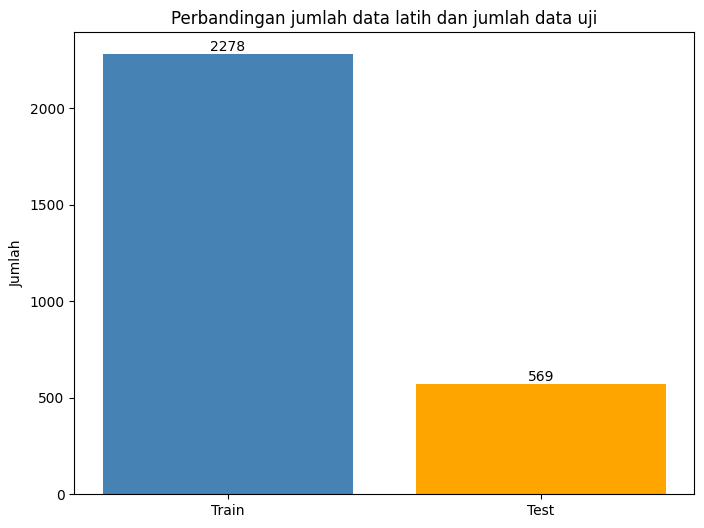

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have corrected the typo
len_train = sum(len_data['train'].values())
len_test = sum(len_data['test'].values())

# Data for plotting
labels = ['Train', 'Test']
sizes = [len_train, len_test]

# Plotting the data
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=['steelblue', 'orange'])
plt.title('Perbandingan jumlah data latih dan jumlah data uji')
plt.ylabel('Jumlah')

# Adding numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.show()


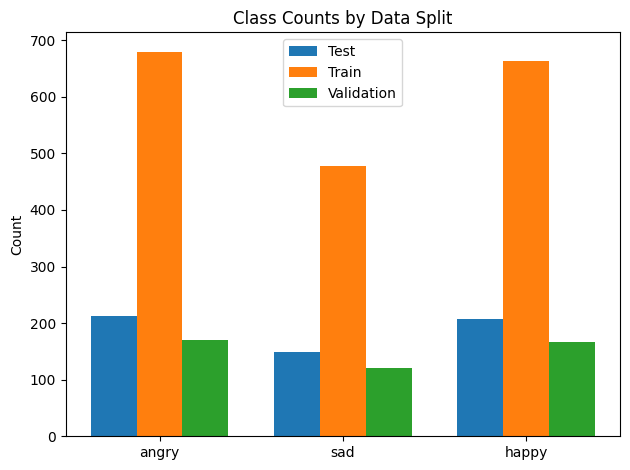

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['angry', 'sad', 'happy']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, [len_data['test'][l] for l in labels], width, label='Test')
rects2 = ax.bar(x, [len_data['train'][l] for l in labels], width, label='Train')
rects3 = ax.bar(x + width, [len_data['val'][l] for l in labels], width, label='Validation')

ax.set_ylabel('Count')
ax.set_title('Class Counts by Data Split')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
transforms

Compose(
      Resize(size=[384, 384], interpolation=InterpolationMode.BICUBIC, antialias=True)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
      ToImage()
      ToDtype(scale=True)
)

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torchvision import models


device = 'cuda' if torch.cuda.is_available() else 'cpu'

data_dir = '/content/Human Emotion Classification'

train_data = ImageFolder(
    f'{data_dir}/train',
    transform=train_transforms
)

val_data = ImageFolder(
    f'{data_dir}/val',
    transform=transforms
)

test_data = ImageFolder(
    f'{data_dir}/test',
    transform=transforms
)

class_names = test_data.classes

len(train_data), len(val_data), len(test_data), class_names

(1822, 456, 569, ['angry', 'happy', 'sad'])

In [ ]:
# import matplotlib.pyplot as plt
# import random

# sample = random.sample(range(len(train_data)), 6)

# r, c = 2, 3
# fig, ax = plt.subplots(r, c, figsize=[15, 9])
# fig.suptitle('Augmented Images')

# idx = 0
# for i in range(r):
#     for j in range(c):
#         data = train_data[sample[idx]]
#         img = data[0].permute(1, 2, 0).numpy()
#         label = class_names[data[1]]

#         ax[i, j].imshow(img)
#         ax[i, j].set_title(label)
#         ax[i, j].axis(False)

#         idx += 1

In [ ]:
from torch.utils.data import default_collate

cutmix = v2.CutMix(num_classes=len(class_names), alpha=1.0)
mixup = v2.MixUp(num_classes=len(class_names), alpha=0.2)
cutmix_or_mixup = v2.RandomChoice([cutmix, mixup], p=[0.5, 0.5])

def collate_fn(batch):
    return cutmix_or_mixup(*default_collate(batch))

batch_size = 16

train_dataloader = DataLoader(
    train_data,
    batch_size=batch_size,
    num_workers=2,
    collate_fn=collate_fn,
    shuffle=True,
    prefetch_factor=2
)

val_dataloader = DataLoader(
    val_data,
    batch_size=batch_size,
    num_workers=2,
    prefetch_factor=2
)

test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
    num_workers=2
)

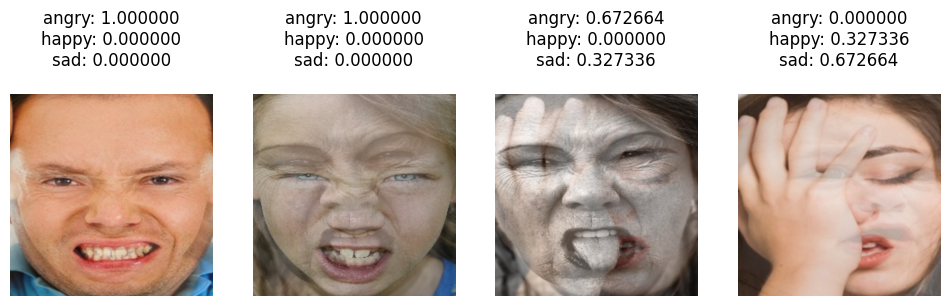

In [ ]:
import matplotlib.pyplot as plt

dummy_transforms = v2.Compose(transforms.transforms[:3])
dummy_data = ImageFolder('/content/Human Emotion Classification/test', transform=dummy_transforms)
dummy_dataloader = DataLoader(
    dummy_data,
    batch_size=batch_size,
    collate_fn=collate_fn,
    shuffle=True
)

for img, label in dummy_dataloader:
    fig, axs = plt.subplots(1, 4, figsize=[12, 6])
    for i in range(4):
        axs[i].imshow(img[i].permute(1, 2, 0).numpy())

        title = ''
        for cls, l in zip(class_names, label[i].numpy()):
            title += f'{cls}: {l:4f}\n'
        axs[i].set_title(title)
        axs[i].axis('off')
    break

In [ ]:
import os
import torch

from torch.cuda.amp import GradScaler
from typing import Dict
from tqdm.notebook import tqdm

scaler = GradScaler()
def train_step(model, data_loader, loss_fn, optimizer, device, use_amp=False):
    model.to(device)
    model.train()
    train_loss, train_acc = 0, 0

    data_loader_iter = tqdm(enumerate(data_loader), desc="Training", unit="step", total=len(data_loader))

    for batch, (X, y) in data_loader_iter:
        X, y = X.to(device), y.to(device)

        if use_amp:
            with torch.autocast(device_type=device, dtype=torch.float16):
                y_pred = model(X)
                loss = loss_fn(y_pred, y)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        else:
            y_pred = model(X)
            loss = loss_fn(y_pred, y)

            loss.backward()
            optimizer.step()

        train_loss += loss.item()
        optimizer.zero_grad(set_to_none=True)

        data_loader_iter.set_postfix({"Train Loss": f"{train_loss / (batch + 1):.4f}"})

    train_loss /= len(data_loader)

    return train_loss, train_acc

def val_step(model, data_loader, loss_fn, device):
    model.to(device)
    model.eval()

    val_loss, val_acc = 0, 0

    data_loader_iter = tqdm(enumerate(data_loader), desc="Validation", unit="step", total=len(data_loader))

    with torch.inference_mode():
        for batch, (X_val, y_val) in data_loader_iter:
            X_val, y_val = X_val.to(device), y_val.to(device)

            val_pred = model(X_val)

            loss = loss_fn(val_pred, y_val)
            val_loss += float(loss)

            val_pred_class = val_pred.argmax(dim=1)
            acc = (val_pred_class == y_val).sum().item() / len(val_pred_class)
            val_acc += acc

            data_loader_iter.set_postfix({"Val Loss": f"{val_loss / (batch + 1):.4f}", "Val Acc": f"{val_acc / (batch + 1):.4f}"})

    val_loss /= len(data_loader)
    val_acc /= len(data_loader)

    return val_loss, val_acc

def train(model, train_dataloader, val_dataloader, optimizer, loss_fn, scheduler, epochs, device, use_amp=False, progress=True) -> Dict[str, list]:
    os.makedirs('/models', exist_ok=True)
    result = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': [],
        'lr': []
    }

    for epoch in range(epochs):
        print(f"Epoch: {epoch+1} | lr: {scheduler.get_last_lr()}")
        result['lr'].append(scheduler.get_last_lr())
        train_loss, train_acc = train_step(
            model,
            train_dataloader,
            loss_fn,
            optimizer,
            device,
            use_amp
        )

        result['train_loss'].append(float(train_loss))

        val_loss, val_acc = val_step(
            model,
            val_dataloader,
            loss_fn,
            device
        )

        result['val_loss'].append(float(val_loss))
        result['val_acc'].append(val_acc)


        scheduler.step()
        torch.save(model.state_dict(), f'/models/model-{epoch}.pth')
    return result


In [ ]:
for name in model.base_model.named_children():
    print(name[0])

stem
stages
norm_pre
head


In [ ]:
import torch
import timm
from torch import nn

freeze_base_model = False
model = CNN(model_name, len(class_names), freeze_base_model)
epochs = 1


param_groups = []
decay = []
no_decay = []

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if len(param.shape) == 1 or name.endswith(".bias"):
        no_decay.append(param)
    else:
        decay.append(param)

param_groups.append({"params": no_decay, "weight_decay": 0.0})
param_groups.append({"params": decay, "weight_decay": 0.001})

optimizer = torch.optim.AdamW(param_groups, lr=3e-5) # < 0.0009

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
loss_fn = nn.CrossEntropyLoss()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

result = train(
    model=model,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    scheduler=scheduler,
    epochs=epochs,
    use_amp=True,
    device=device
)

Epoch: 1 | lr: [3e-05, 3e-05]


Training:   0%|          | 0/114 [00:00<?, ?step/s]

Validation:   0%|          | 0/29 [00:00<?, ?step/s]

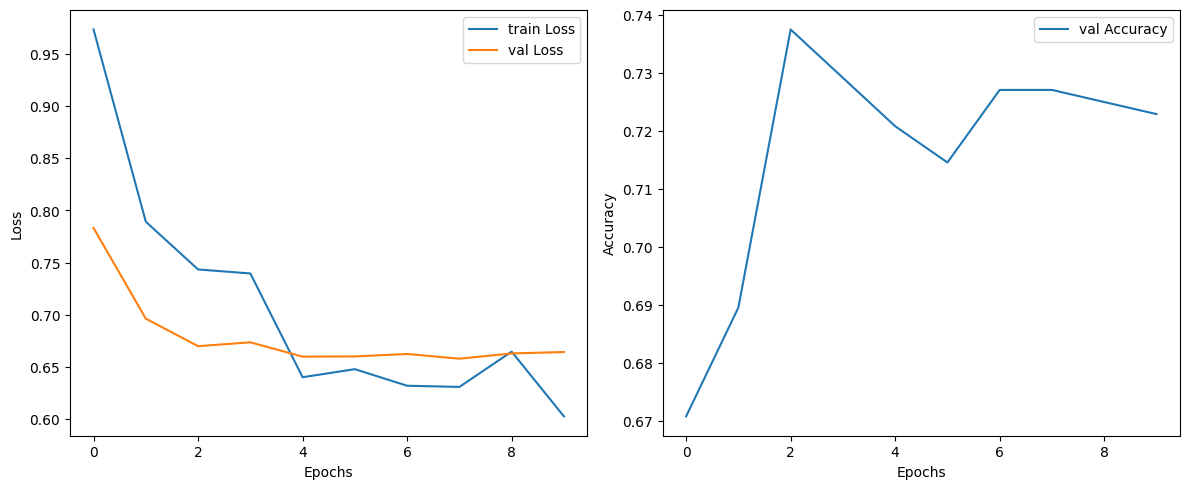

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(result["train_loss"], label="train Loss")
axs[0].plot(result["val_loss"], label="val Loss")
axs[0].legend()
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")

axs[1].plot(result["val_acc"], label="val Accuracy")
axs[1].legend()
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

model.to(device)
best_model = []
with torch.inference_mode():
    for i in range(epochs):
        model.load_state_dict(torch.load(f'/models/model-{i}.pth'))

        all_labels = []
        all_predictions = []
        for data, label in tqdm(test_dataloader):
            data, label = data.to(device), label.to(device)
            logits = model(data)

            predictions = logits.argmax(1).cpu().numpy()
            all_predictions.extend(predictions)
            all_labels.extend(label.cpu().numpy())

        f1 = f1_score(all_labels, all_predictions, average='weighted')
        acc = accuracy_score(all_labels, all_predictions)
        best_model.append(f1+acc)
        print(f"F1 Score: {f1} | Accuracy: {acc}")

best_model = np.argmax(best_model, axis=0)

  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.6947726852280085 | Accuracy: 0.70298769771529


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7126183959532751 | Accuracy: 0.7152899824253075


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7247672810008613 | Accuracy: 0.7240773286467487


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7256751245169084 | Accuracy: 0.7275922671353251


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7413750753443327 | Accuracy: 0.7398945518453427


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7414491262663065 | Accuracy: 0.7398945518453427


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7374222928574247 | Accuracy: 0.7363796133567663


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.737469398649914 | Accuracy: 0.7363796133567663


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7375089887361571 | Accuracy: 0.7363796133567663


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7315003398782369 | Accuracy: 0.7311072056239016


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

model.load_state_dict(torch.load(f'/models/model-{best_model}.pth'))

model.to(device)
all_labels = []
all_predictions = []

with torch.inference_mode():
    for data, label in tqdm(test_dataloader):
        data, label = data.to(device), label.to(device)
        logits = model(data)

        predictions = logits.argmax(1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(label.cpu().numpy())

f1 = f1_score(all_labels, all_predictions, average='weighted')
acc = accuracy_score(all_labels, all_predictions)
print(f"F1 Score: {f1} | Accuracy: {acc}")


  0%|          | 0/18 [00:00<?, ?it/s]

F1 Score: 0.7414491262663065 | Accuracy: 0.7398945518453427


In [ ]:
torch.save(model.state_dict(), f'/content/drive/MyDrive/Colab Notebooks/{model_name}-fine-tuned-{5}-{f1:4f}.pth')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pathlib
import random

from PIL import Image

test_paths = list(pathlib.Path('/content/Human Emotion Classification/test').glob("*/*.jpg"))

model.load_state_dict(torch.load(f'/models/model-{best_model}.pth'))
model.to(device)
samples = random.sample(test_paths, k=6)

r, c = 2, 3
fig, ax = plt.subplots(r, c, figsize=[15, 9])
fig.suptitle('Predictions')

idx = 0
for i in range(r):
    for j in range(c):
        img = Image.open(samples[idx])

        img_transformed = transforms(img).unsqueeze(dim=0).to(device)

        model.eval()
        with torch.inference_mode():
            logits = model(img_transformed)
            pred_prob = torch.softmax(logits, dim=1)
            label = class_names[torch.argmax(pred_prob, dim=1)]

        ax[i, j].imshow(img)
        ax[i, j].set_title(f"{samples[idx].parent.stem}\npred: {label}")
        ax[i, j].axis(False)

        idx += 1

## Demo

In [ ]:
!pip install -q gradio

In [ ]:
import cv2

import urllib.request
import numpy as np

url = 'https://hips.hearstapps.com/hmg-prod/images/gettyimages-1659521003.jpg'

resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

In [ ]:
import cv2

import urllib.request
import numpy as np

# url = 'https://hips.hearstapps.com/hmg-prod/images/gettyimages-1659521003.jpg'

# resp = urllib.request.urlopen(url)
# image = np.asarray(bytearray(resp.read()), dtype="uint8")
# image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.imread('/content/Human Emotion Classification/test/angry/1.jpg')
image = cv2.resize(image, (512, 512))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
	cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
	faces = image[y:y + h, x:x + w]
	cv2.imwrite('face.jpg', faces)


In [ ]:
image

In [ ]:
import torch
import torchvision
import gradio
import pathlib
import random
import timm

from torch import nn
from typing import Tuple, Dict
from PIL import Image
from timeit import default_timer as timer
from typing import Tuple, Dict


device = 'cpu'
class_names = ['Angry', 'Happy', 'Sad']

class ConvNextv2(torch.nn.Module):
    def __init__(self, num_classes, freeze_base_model=True):
        super().__init__()
        self.base_model = timm.create_model(
            model_name='convnextv2_base.fcmae_ft_in22k_in1k',
            pretrained=True,
            num_classes=num_classes)

    def forward(self, x):
        return self.base_model(x)

    def get_transforms(self, is_training):
        data_config = timm.data.resolve_model_data_config(self.base_model)
        return timm.data.create_transform(**data_config, is_training=is_training)

def load_model():
    model = ConvNextv2(3)
    model.load_state_dict(torch.load('/models/model-8.pth'))

    transforms = model.get_transforms(False)
    return model, transforms

model, transforms = load_model()

def predict(img):
    start = timer()
    model.to(device)
    model.eval()
    with torch.inference_mode():
        transformed_img = transforms(img).to(device)
        logits = model(transformed_img.unsqueeze(dim=0))
        pred_prob = torch.softmax(logits, dim=1)
        pred_dict = {class_names[i]:pred_prob.squeeze(0)[i].item() for i in range(len(class_names))}

    pred_time = round(timer() - start, 5)
    return pred_dict, pred_time


example_paths = list(pathlib.Path('Human Emotion Classification/test').glob("*/*.jpg"))
example_list = [[str(filepath)] for filepath in random.sample(example_paths, k=6)]


title = 'Klasifikasi Emosi Manusia berdasarkan Wajah'
description = '..'


demo = gradio.Interface(
    fn=predict,
    inputs=gradio.Image(type='pil', label='Image'),
    outputs=[gradio.Label(num_top_classes=3, label='Predictions'),
             gradio.Number(label="Prediction time (s)")],
    description=description,
    title=title,
    allow_flagging='never',
    examples=example_list
)

demo.launch(debug=True)

## HHHH

Token is valid (permission: read).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
!pip install hf_transfer
import os
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 11.4 MB/s eta 0:00:00
